In [1]:
from pytrans.waveform import draw_potential_1d

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from pytrans.waveform import draw_potential_1d
from pytrans.constants import um, MHz
from pytrans.solver import static_solver

from pytrans.trap_model.segtrap import ETH3dTrap

In [4]:
pos = 0 * um
freq = 2 * MHz
offs = 1

energy_threshold = 0.1
trap = ETH3dTrap()
x = trap.transport_axis
potential, gaussian_weight, roi = draw_potential_1d(x, pos, freq, offs, energy_threshold=energy_threshold)

In [7]:
x_roi = x[roi]

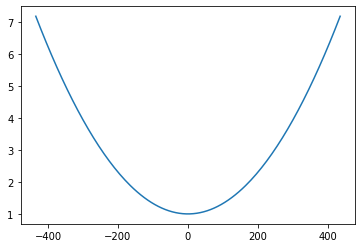

In [9]:
fig, ax = plt.subplots()

ax.plot(x_roi / um, potential)

In [12]:
import numpy as np

from pytrans.constants import mass_Ca, atomic_mass_unit, electron_charge


def freq_to_curvature(freq, mass=mass_Ca, charge=1):
    return (2 * np.pi * freq) ** 2 * atomic_mass_unit * mass / (2 * electron_charge * charge)



In [31]:
# def draw_transport_potential_1d(
    
poss = np.linspace(0, 200, 10) * um  # shape: len_t, 1
freqs = 2 * MHz
offs = 0

# moments.shape = len_x, num_electrodes
# in the end I wnt potentials.shape = len_t, len_x

energy_threshold = 0.1
anharmonic_terms=[]

poss = np.atleast_2d(poss).reshape(-1, 1)
freqs = np.atleast_2d(freqs).reshape(-1, 1)
offs = np.atleast_2d(offs).reshape(-1, 1)
x = x.reshape(1, -1)

a = freq_to_curvature(freqs)
potential = a * (x - poss) ** 2

In [32]:
width = x[np.where(potential <= energy_threshold)].ptp() / 2  # this factor of 2 is correct

IndexError: index 1 is out of bounds for axis 0 with size 1

In [37]:
dx = np.diff(x).mean()

In [ ]:
np.broadcast_to

In [40]:
(x - poss).shape

(10, 943)

In [34]:
(potential <= energy_threshold).shape

(10, 943)

In [ ]:
# TODO: potential += anharmonic_terms
potential += offs
gaussian_weight = np.exp(-((x - pos) ** 2) / 2 / width ** 2)
# roi = slice(*np.where((abs(x - pos) < 8 * width))[0][[0, -1]])
roi = abs(x - pos) < 8 * width  # change to logical array
return potential[roi], gaussian_weight[roi], roi

In [27]:
potential.shape

(10, 943)

In [46]:
A = np.arange(9).reshape(3, 3)
roi = np.asarray([
    [1, 1, 0],
    [1, 0, 1],
    [1, 1, 0]
]).astype(bool)

In [47]:
A[roi]

array([0, 1, 3, 5, 6, 7])

In [58]:
a, b = np.broadcast_arrays(np.atleast_1d(3), 5)

In [60]:
a

array([3])

In [59]:
a.shape

(1,)